In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
clean_df = pd.read_csv(r'D:\Mission - 1\Project\AI\Resume_Building\clean_resume_data.csv')

In [5]:
clean_df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [32]:
clean_df.shape

(2484, 3)

In [33]:
clean_df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

## EDA

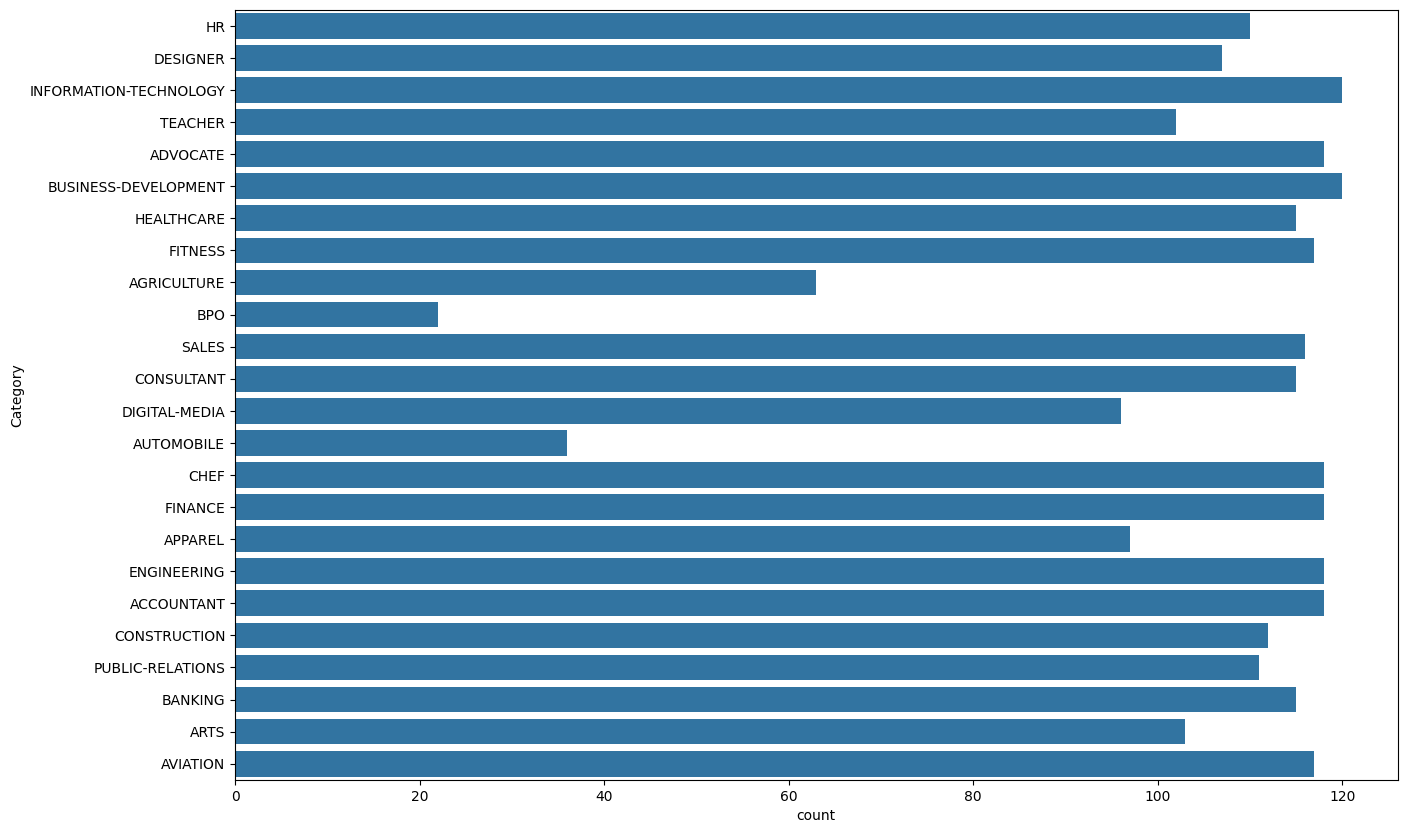

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(clean_df['Category'])
plt.show()

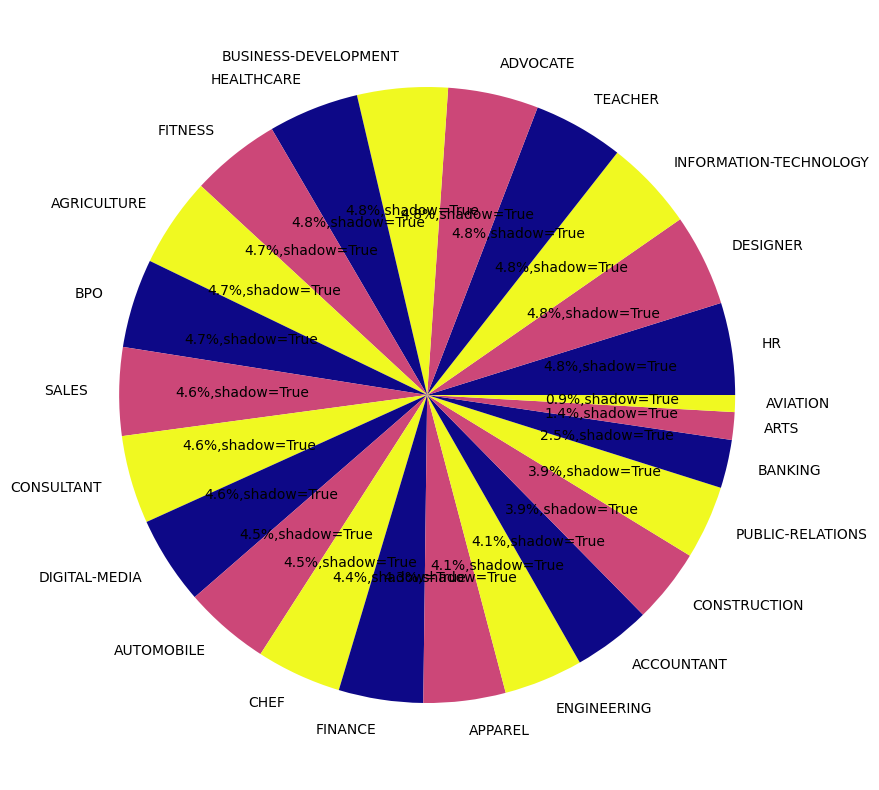

In [35]:
counts = clean_df['Category'].value_counts()
labels = clean_df['Category'].unique()
plt.figure(figsize=(10,10))

plt.pie(counts, labels=labels, autopct="%1.1f%%,shadow=True", colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [36]:
from sklearn.utils import resample

max_count = clean_df['Category'].value_counts().max()

balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category']== category ]
    if len(category_data) <max_count:
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

balanced_df = pd.concat(balanced_data)


In [37]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
TEACHER                   120
ADVOCATE                  120
BUSINESS-DEVELOPMENT      120
HEALTHCARE                120
FITNESS                   120
AGRICULTURE               120
BPO                       120
SALES                     120
CONSULTANT                120
DIGITAL-MEDIA             120
AUTOMOBILE                120
CHEF                      120
FINANCE                   120
APPAREL                   120
ENGINEERING               120
ACCOUNTANT                120
CONSTRUCTION              120
PUBLIC-RELATIONS          120
BANKING                   120
ARTS                      120
AVIATION                  120
Name: count, dtype: int64

In [38]:
X=balanced_df['Feature']
y=balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [39]:
tfidf_vectorizer = TfidfVectorizer()
X_train_filled = X_train.fillna("")
X_test_filled = X_test.fillna("")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_filled)
X_test_tfidf = tfidf_vectorizer.transform(X_test_filled)

X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 181935 stored elements and shape (576, 29916)>

In [40]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf,y_train)

y_pred = rf_classifier.predict(X_test_tfidf)
accuracy= accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy*100,'%')

Accuracy:  85.24305555555556 %


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.90      0.95      0.93        20
              ADVOCATE       0.85      0.79      0.82        29
           AGRICULTURE       0.95      0.91      0.93        23
               APPAREL       0.85      0.77      0.81        22
                  ARTS       0.94      0.67      0.78        24
            AUTOMOBILE       1.00      0.68      0.81        19
              AVIATION       0.93      1.00      0.97        28
               BANKING       0.88      0.64      0.74        22
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.45      0.56      0.50        18
                  CHEF       0.85      1.00      0.92        28
          CONSTRUCTION       0.93      1.00      0.96        25
            CONSULTANT       0.96      0.77      0.86        31
              DESIGNER       0.86      0.86      0.86        28
         DIGITAL-MEDIA       0.83      

##### A heat map is a data visualization that uses colors to show intensity or magnitude of values, making complex patterns easy to interpret at a glance.

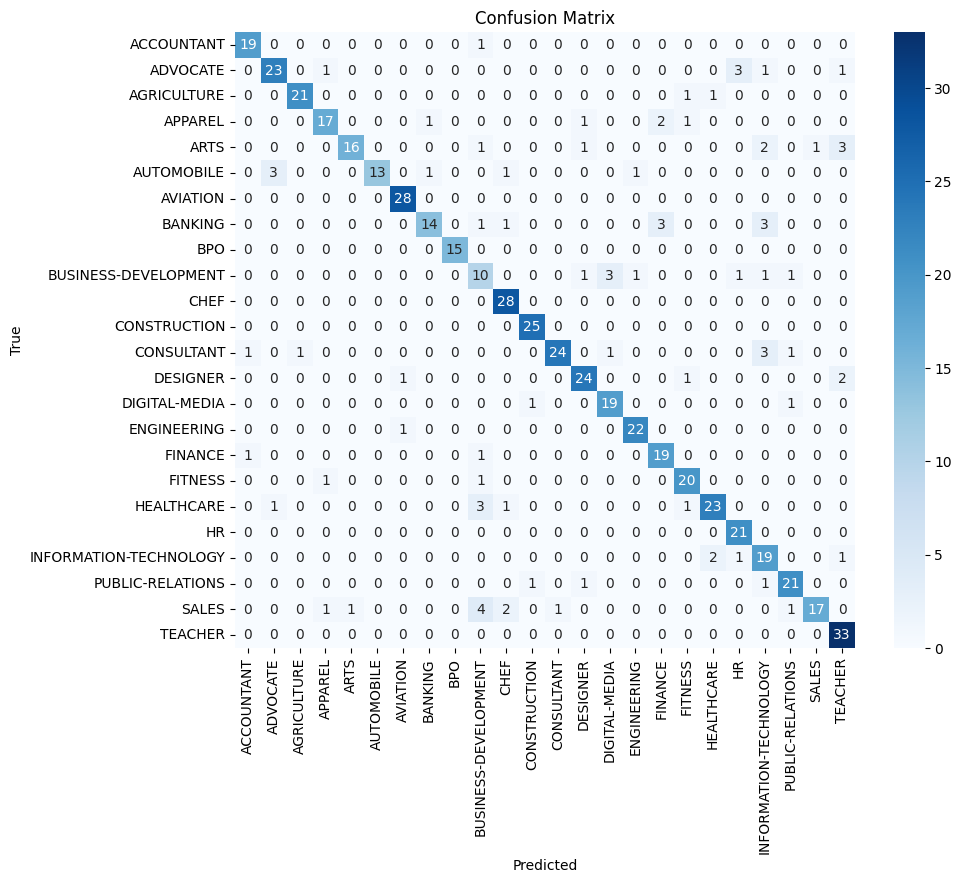

In [42]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot= True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_,yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import re

def cleanResume(resume_text):
    cleantext = re.sub('http\\S+\\s*', ' ', resume_text)  # remove URLs
    cleantext = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    cleantext = re.sub('#\\S+', '', resume_text)  # remove hashtags
    cleantext = re.sub('@\\S+', '  ', resume_text)  # remove mentions
    cleantext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    cleantext = re.sub(r'[^\x00-\x7f]',r' ', resume_text)  # remove non-ASCII characters
    cleantext = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    return cleantext


def predict_category(resume_text):
    resume_text = cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Naman Sharan Yadav\AppData\Local\Temp\ipykernel_6784\399887571.py:10: SyntaxWarning: invalid escape sequence '\s'
  cleantext = re.sub('\s+', ' ', resume_text)  # remove extra whitespace


In [52]:
resume_file = """\
=========================
        RESUME
=========================

Name: [Your Name]
Email: [your.email@example.com]
Phone: +91-XXXXXXXXXX
LinkedIn: linkedin.com/in/yourprofile
GitHub: github.com/yourusername

-------------------------
Career Objective
-------------------------
To secure a challenging position in a reputable organization where I can utilize my skills,
expand my knowledge, and contribute to organizational growth.

-------------------------
Education
-------------------------
Bachelor of Computer Applications (BCA)
[Your College Name], [Your University]
Year: [Start Year] - [End Year]

-------------------------
Skills
-------------------------
- Programming Languages: Python, C, Java
- Web Technologies: HTML, CSS, JavaScript, Django
- Databases: MySQL, SQLite
- Tools: Git, VS Code, Jupyter Notebook

-------------------------
Projects
-------------------------
1. AI-powered Government Scheme Chatbot
   - Built using Python, Machine Learning, LangChain, and RAG
   - Provides students and parents with financial aid and scheme information

2. Crop Yield & Weather Impact Prediction System
   - Developed with Python, ML models, and data visualization
   - Helps in agriculture and disaster management planning

-------------------------
Experience / Internships
-------------------------
[Company/Organization Name] – [Role]
[Start Date] – [End Date]
- Describe your responsibilities and achievements here

-------------------------
Achievements
-------------------------
- Selected among 3000 students for IBM AI-powered project jury
- Participated in The Fourfold Code Quest coding competition

-------------------------
Personal Details
-------------------------
Date of Birth: DD/MM/YYYY
Languages: English, Hindi
Location: [Your City, State]

-------------------------
Declaration
-------------------------
I hereby declare that the above information is true to the best of my knowledge.

[Your Name]
"""
predicted_category = predict_category(resume_file)
print("Predicted Category: ",predicted_category)

Predicted Category:  AGRICULTURE


In [54]:
import pickle
pickle.dump(rf_classifier,open('D:\Mission - 1\Project\AI\Resume_Building/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer, open('D:\Mission - 1\Project\AI\Resume_Building/tfidf_vectorizer_categorization.pkl','wb'))

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Naman Sharan Yadav\AppData\Local\Temp\ipykernel_6784\54249270.py:2: SyntaxWarning: invalid escape sequence '\M'
  pickle.dump(rf_classifier,open('D:\Mission - 1\Project\AI\Resume_Building/rf_classifier_categorization.pkl','wb'))
C:\Users\Naman Sharan Yadav\AppData\Local\Temp\ipykernel_6784\54249270.py:3: SyntaxWarning: invalid escape sequence '\M'
  pickle.dump(tfidf_vectorizer, open('D:\Mission - 1\Project\AI\Resume_Building/tfidf_vectorizer_categorization.pkl','wb'))
